### 1. Install and Import Dependencies

In [1]:
%pip install pandas==2.0.0
%pip install matplotlib==3.7.1
%pip install ipympl==0.9.3 
%pip install scikit-learn==1.2.2

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn==1.2.2 in c:\users\sabde\decision_tree\decision_tree\lib\site-packages (1.2.2)




[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip list

Package            Version
------------------ -------
asttokens          2.2.1
backcall           0.2.0
colorama           0.4.6
comm               0.1.3
contourpy          1.0.7
cycler             0.11.0
debugpy            1.6.7
decorator          5.1.1
executing          1.2.0
fonttools          4.39.3
ipykernel          6.22.0
ipympl             0.9.3
ipython            8.12.0
ipython-genutils   0.2.0
ipywidgets         8.0.6
jedi               0.18.2
joblib             1.2.0
jupyter_client     8.2.0
jupyter_core       5.3.0
jupyterlab-widgets 3.0.7
kiwisolver         1.4.4
matplotlib         3.7.1
matplotlib-inline  0.1.6
nest-asyncio       1.5.6
numpy              1.24.2
packaging          23.1
pandas             2.0.0
parso              0.8.3
pickleshare        0.7.5
Pillow             9.5.0
pip                22.3.1
platformdirs       3.2.0
prompt-toolkit     3.0.38
psutil             5.9.4
pure-eval          0.2.2
Pygments           2.15.0
pyparsing          3.0.9
python-dateut


[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd  # to load and manipulate data for One-Hot-Encoding
import numpy as np  # to calculate mean and standard deviation
%matplotlib widget
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier  # to build a classification tree
from sklearn.tree import plot_tree  # to draw a classification tree
from sklearn.model_selection import train_test_split  # to split data in training and testing sets
from sklearn.model_selection import cross_val_score  # for cross validation
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

### 2. Import data

In [4]:
df = pd.read_csv("processed.cleveland.data", header=None)

# or download
# df = pd.read("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
# header=None)

df.columns = ["age", "sex", "cp", "restbp", "chol", "fbs", "restecg", "thalach", "exang", 
                "oldpeak", "slope", "ca", "thal", "hd"]

df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### 3. Identifying missing data 
- check data types - if object then chance of missing data high 

In [5]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [6]:
df["ca"].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [7]:
df["thal"].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

### 4. Deal with missing data
- Not much missing data relatively speaking, so deleting the rows is just fine 

In [8]:
print("missing data: ", len(df.loc[(df["ca"] == "?") | (df["thal"] == "?")]))
print("missing data in %: ", len(df.loc[(df["ca"] == "?") | (df["thal"] == "?")]) / len(df) * 100)
df.loc[(df["ca"] == "?") | (df["thal"] == "?")]

missing data:  6
missing data in %:  1.9801980198019802


,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [9]:
df_no_missing = df.loc[(df["ca"] != "?") & (df["thal"] != "?")]

# no missing data anymore
df_no_missing["ca"].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [10]:
df_no_missing["thal"].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

### 5. Split data
- Split in classification X and predict y data sets
- predict: hd for hearth disease 

In [11]:
X = df_no_missing.drop("hd", axis="columns").copy()
X

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0


In [12]:
y = df_no_missing["hd"].copy()
y

0      0
1      2
2      1
3      0
4      0
      ..
297    1
298    1
299    2
300    3
301    1
Name: hd, Length: 297, dtype: int64

### 6. One-Hot Encoding
- sklearn does support continuos data but not categorical data
- Trick to convert categorical data to multiple columns with binary values.<br>Otherwise machine learning models would consider values like 1 & 2 closer than 1 & 4, although numbers do not have any relation
- Only needed if there are more than 2 categories 

In [13]:
X_encoded = pd.get_dummies(X, columns=["cp", "restecg", "slope", "thal"])
# alternatively: from sklearn ColumnTransporter()

X_encoded

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,True,...,False,False,False,True,False,False,True,False,True,False
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,False,...,True,False,False,True,False,True,False,True,False,False
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,False,...,True,False,False,True,False,True,False,False,False,True
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,False,...,False,True,False,False,False,False,True,True,False,False
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,False,...,False,False,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,140.0,241.0,0.0,123.0,1.0,0.2,0.0,False,...,True,True,False,False,False,True,False,False,False,True
298,45.0,1.0,110.0,264.0,0.0,132.0,0.0,1.2,0.0,True,...,False,True,False,False,False,True,False,False,False,True
299,68.0,1.0,144.0,193.0,1.0,141.0,0.0,3.4,2.0,False,...,True,True,False,False,False,True,False,False,False,True
300,57.0,1.0,130.0,131.0,0.0,115.0,1.0,1.2,1.0,False,...,True,True,False,False,False,True,False,False,False,True


- y contains categorical data from 0 to 4. For simplicity data points greater than 1 will be converted to 1

In [14]:
y[y > 1] = 1
y.unique()

array([0, 1], dtype=int64)

### 7. Preliminary decision tree
- Note: use random_state to recreate the same model
- One reason why it performs poor: overfitting 

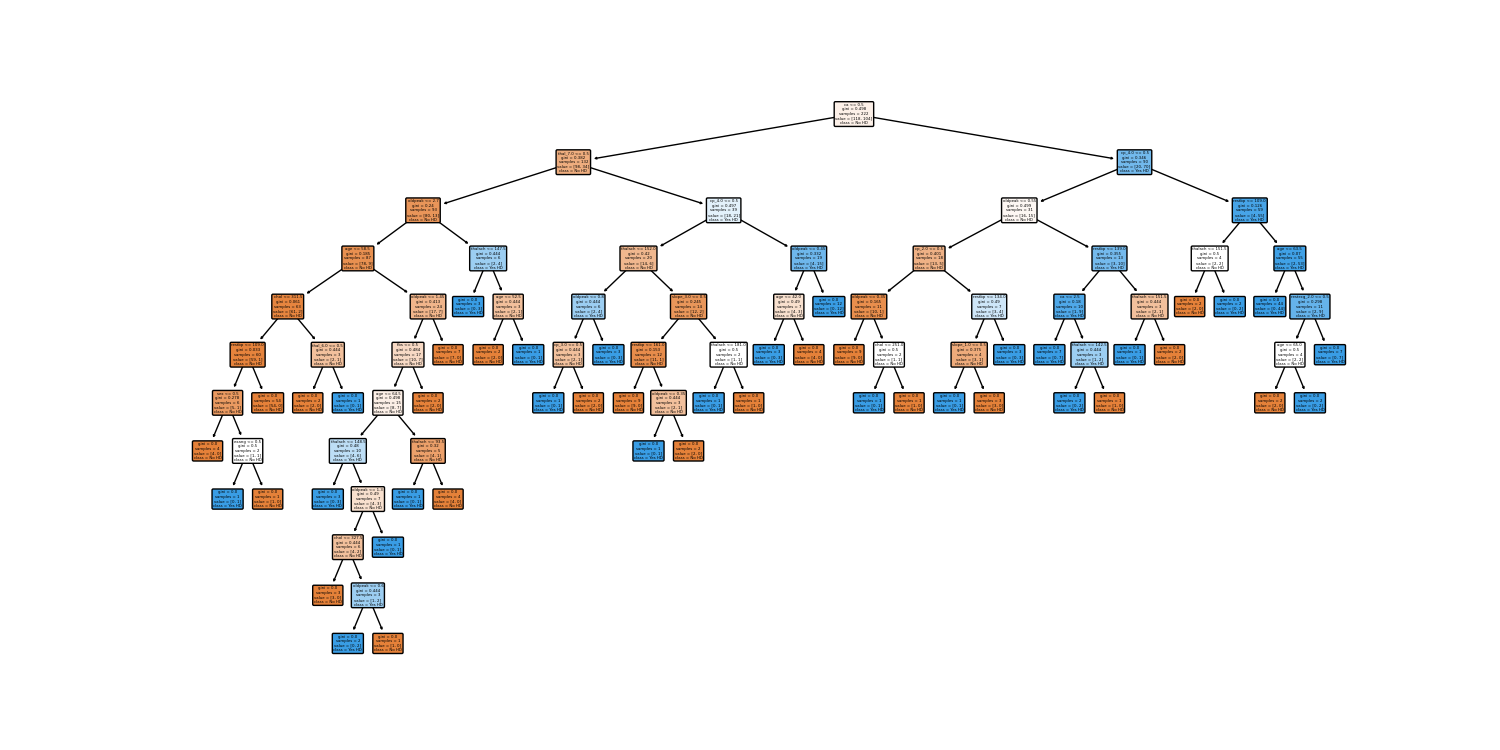

In [15]:
# split data into training and testing data
# default: test_size=0.25 & shuffle=True 
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

# create a decision tree and fit it to the training data
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

# plotting the tree
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt, filled=True, rounded=True, class_names=["No HD", "Yes HD"], feature_names=X_encoded.columns)
plt.show()

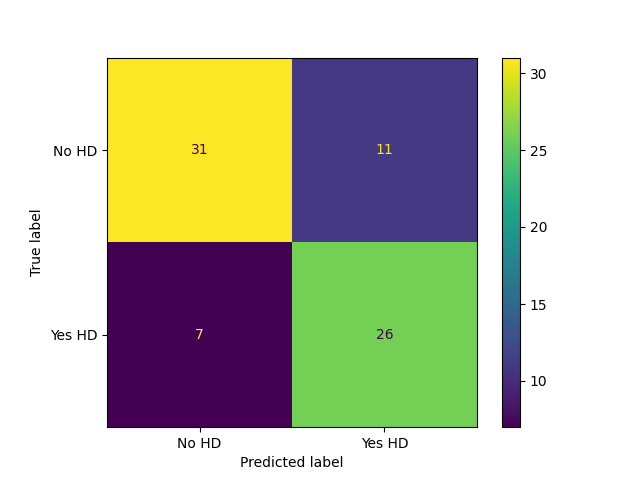

In [16]:
# plot the confusion matrix
cm = confusion_matrix(y_test, clf_dt.predict(X_test))
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No HD", "Yes HD"])
display.plot()

### 8. Optimize tree: cost complexity pruning - visualize alpha

In [17]:
# determine values for alpha
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
# extract different values for alpha
ccp_alphas = path.ccp_alphas
# exclude max alpha which is the root
ccp_alphas = ccp_alphas[:-1]

# list to put in decision trees
clf_dts = []

# create 1 decision tree per value for alpha and append to list
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

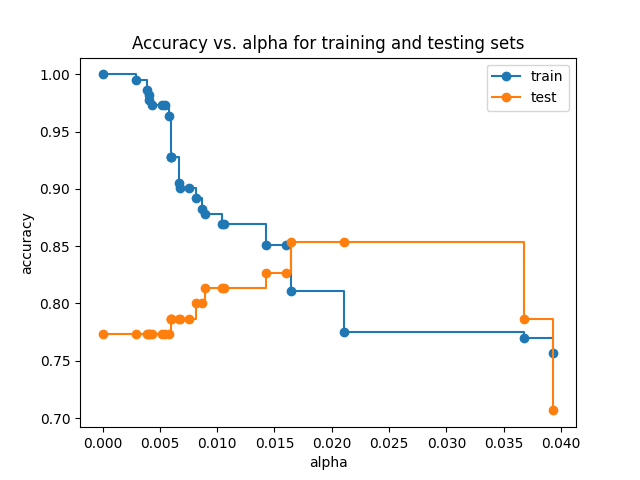

In [18]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs. alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

### 9. Cost complexity pruning: cross validation - finding best alpha
- Note: as the graph above suggest the best alpha is around 0.016 but it is not
- Note: grid search also possible

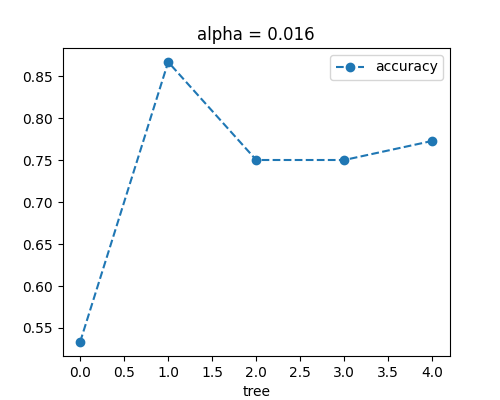

In [19]:
clf_dt = DecisionTreeClassifier(ccp_alpha=0.016)
scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data={"tree": range(5), "accuracy": scores})
df.plot(x="tree", y="accuracy", title="alpha = 0.016", marker="o", linestyle="--", figsize=(5, 4))
plt.show()

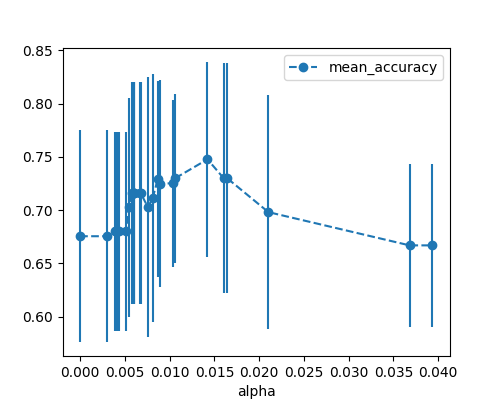

In [20]:
# array to store the result of each fold during cross validation
alpha_loop_values = []

# doing 5-fold cross validation and save mean and std of scores
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    # returns: array of scores for each run of the cross validation
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

# plot for each alpha mean and std of scores
alpha_results = pd.DataFrame(alpha_loop_values, columns=["alpha", "mean_accuracy", "std"])

# yerr: y error, the smaller the better
alpha_results.plot(x="alpha", y="mean_accuracy", yerr="std", marker="o", linestyle="--", figsize=(5, 4))
plt.show()

### 10. Evaluating alpha
- alpha should be close to 0.14 according to the graph above

In [21]:
ideal_ccp_alpha = alpha_results[(alpha_results["alpha"] > 0.014)
                    & (alpha_results["alpha"] < 0.015)]["alpha"]
ideal_ccp_alpha

20    0.014225
Name: alpha, dtype: float64

In [22]:
# convert to series to float
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

C:\Users\SAbde\AppData\Local\Temp\ipykernel_7952\3976012700.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ideal_ccp_alpha = float(ideal_ccp_alpha)


0.014224751066856332

### 11. Final classification tree

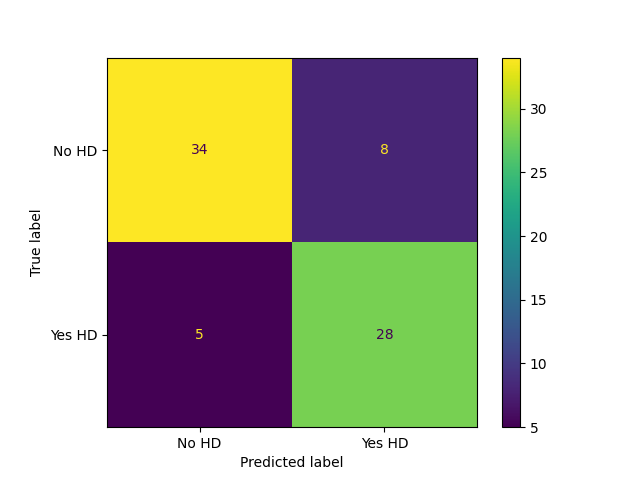

In [23]:
# create a decision tree and fit it to the training data
clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

cm = confusion_matrix(y_test, clf_dt_pruned.predict(X_test))
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No HD", "Yes HD"])
display.plot()

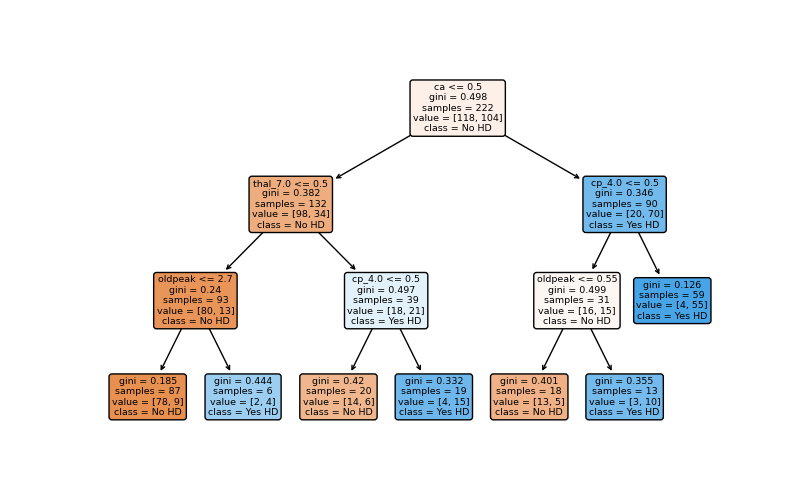

In [24]:
# plotting the tree
plt.figure(figsize=(8, 5))
plot_tree(clf_dt_pruned, filled=True, rounded=True, class_names=["No HD", "Yes HD"],
          feature_names=X_encoded.columns)
plt.show()